Домашняя работа.
Метод Нелдера-Мида.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def func(X):
    x = X[0]
    y = X[1]
    return np.sin(y) * np.exp((1 - np.cos(x)) ** 2) + np.cos(y) * np.exp((1 - np.sin(y)) ** 2) + (x - y) ** 2


In [105]:
def nelder_mid(func, dim, alpha=1, beta=0.5, gamma=2, break_point = 1e-6, need_counter = False, start_point=None):
    #Init
    steps = []
    if start_point is None:
        points = np.append(np.eye(dim), np.zeros(dim)).reshape(dim + 1, dim)
    else:
        points = np.append(np.eye(dim) + start_point, start_point).reshape(dim + 1, dim)
    values = np.apply_along_axis(func, arr=points, axis = 1)
    counter = 0
    while(True):
        counter += 1
        steps.append(np.sum(points, axis = 0) / (dim + 1))
        if np.sum(np.var(points, axis=0) > break_point) == 0:
            if need_counter:
                print(f"Total iterations: {counter}")
            return np.sum(points, axis = 0) / (dim + 1), steps
        min_index = np.argmin(values)
        min_value = values[min_index] #f_l
        min_point = points[min_index] #f_l
    
        max_index = np.argmax(values)
        max_value = values[max_index] #f_h
        max_point = points[max_index] #x_h
    
        values = np.delete(values, max_index)
        points = np.delete(points, max_index, axis = 0)

        max2_index = np.argmax(values)
        max2_value = values[max2_index] #f_g
        max2_point = points[max2_index] #x_g
        
        mass_center = np.sum(points, axis = 0) / dim #x_c
        
        
        
        reflected_point = (1 + alpha) * mass_center - alpha * max_point #x_r
        ref_value = func(reflected_point) #f_r
        
        if ref_value < min_value:
            corrected_point = (1 - gamma) * mass_center + gamma * reflected_point # x_e
            corrected_value = func(corrected_point) #f_e
            
            if corrected_value < ref_value: #add x_e
                values = np.append(values, corrected_value)
                points = np.append(points, corrected_point).reshape(-1, dim)
                continue
                
            if corrected_value > ref_value: #add x_r
                values = np.append(values, ref_value)
                points = np.append(points, reflected_point).reshape(-1, dim)
                continue
                
        if min_value < ref_value and ref_value < max2_value: #add x_r
            values = np.append(values, ref_value)
            points = np.append(points, reflected_point).reshape(-1, dim)
            continue
            
        if max2_value < ref_value and ref_value < max_value: #swap x_r and x_h
            tmp_val = ref_value
            tmp_point = reflected_point
            ref_value = max_value
            reflected_point = max_point
            max_value = tmp_val
            max_point = tmp_point
            
        compressed_point = beta * max_point + (1 - beta) * mass_center
        compressed_value = func(compressed_point)
        
        if compressed_value < max_value: #add x_c
            values = np.append(values, compressed_value)
            points = np.append(points, compressed_point).reshape(-1, dim)
            continue
        
        values = np.append(values, max_value)
        points = np.append(points, max_point).reshape(-1, dim)
        
        min_index = np.argmin(values)
        points = (points - min_point) / 2 + min_point
        points[min_index] = min_point

In [106]:
nelder_mid(func, 2)[0]

array([0.7664206 , 0.93504618])

In [107]:
def square(X):
    x = X[0]
    y = X[1]
    z = X[2]
    return x ** 2 + y ** 2 + z ** 2

res = nelder_mid(square, 3, break_point=1e-30)[0]
square(res)


1.7419036742977686e-30

Видим, что метод работает. Покажем зависимость от гиперпараметров и от начальной точки

In [310]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
x, y = np.meshgrid(x,y)
results = []
for i in range(len(x)):
    for j in range(len(x)):
        results.append(func([x[i][j], y[i][j]]))

In [311]:
res = np.array(results).reshape((len(x),len(x)))

In [312]:
sp = [2,-3]
alphas = [1,2]
betas = [7,3]
gammas = [8, 6]

In [313]:
final1, path1 = nelder_mid(func, 2, start_point=sp, need_counter=True)
final2, path2 = nelder_mid(func, 2, start_point=sp, alpha = alphas[0], beta = betas[0], gamma = gammas[0], need_counter=True)
final3, path3 = nelder_mid(func, 2, start_point=sp, alpha = alphas[1], beta = betas[1], gamma = gammas[1], need_counter=True)

Total iterations: 41
Total iterations: 44
Total iterations: 56


In [314]:
path1 = np.asarray(path1).T
path2 = np.asarray(path2).T
path3 = np.asarray(path3).T

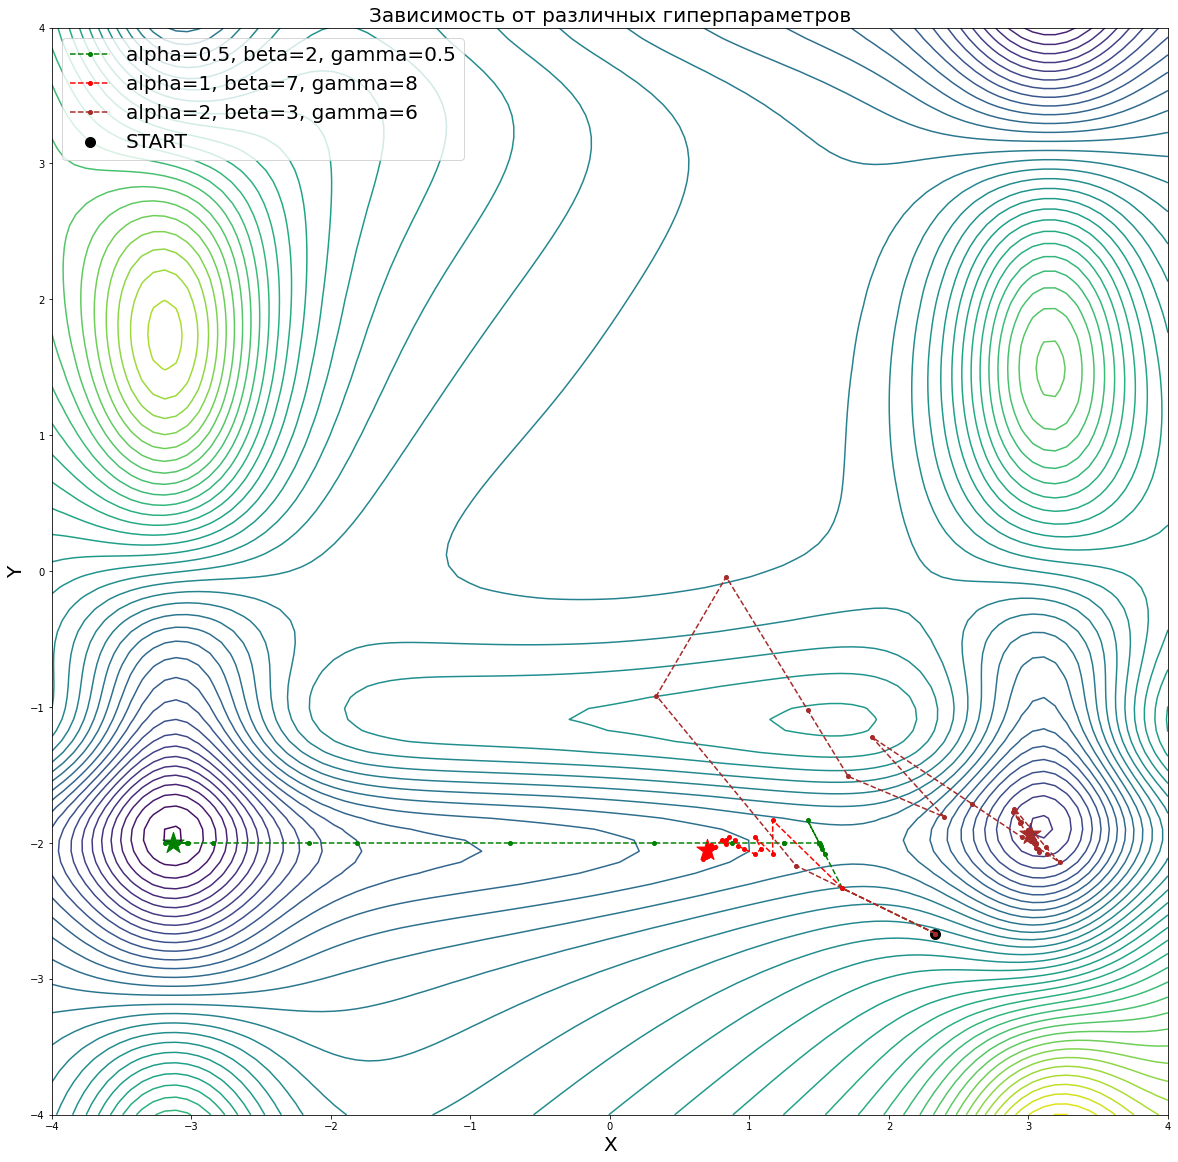

In [331]:
plt.figure(figsize=(20,20))
plt.contour(x, y, res, 40)
plt.plot(path1[0], path1[1], label = f"alpha=0.5, beta=2, gamma=0.5", c='green', ls = "--", marker = '.', markersize=8)
plt.plot(path2[0], path2[1], label = f"alpha=1, beta=7, gamma=8", c = 'red', ls = "--", marker = '.', markersize=8)
plt.plot(path3[0], path3[1], label = f"alpha=2, beta=3, gamma=6", c = 'brown', ls = "--", marker = '.', markersize=8)
plt.scatter(final1[0], final1[1], c='green', s = 500, marker = '*')
plt.scatter(final2[0], final2[1], c='red', s = 500, marker = '*')
plt.scatter(final3[0], final3[1], c='brown', s = 500, marker = '*')
plt.scatter(path1[0][0], path1[1][0], c='black', s = 100, label = "START")
plt.legend(loc=2, prop={'size': 20})
plt.title("Зависимость от различных гиперпараметров", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.show()

При разных гиперпараметрах метод сходится к разным точкам, иногда при не очень хороших где-то "застревает", не дойдя до экстремума(красный график). Обычно при стандартных параметрах метод сходится наиболее хорошо.

***Вывод:***

Гиперпараметры очень сильно влияют на исходные точки

Посмотрим зависимость от начальной точки.

In [340]:
final1, path1 = nelder_mid(func, 2, start_point=[-1, 2], need_counter=True)
final2, path2 = nelder_mid(func, 2, start_point=[3, -1], need_counter=True)
final3, path3 = nelder_mid(func, 2, start_point=[-3, 0], need_counter=True)

Total iterations: 24
Total iterations: 25
Total iterations: 28


In [341]:
path1 = np.asarray(path1).T
path2 = np.asarray(path2).T
path3 = np.asarray(path3).T

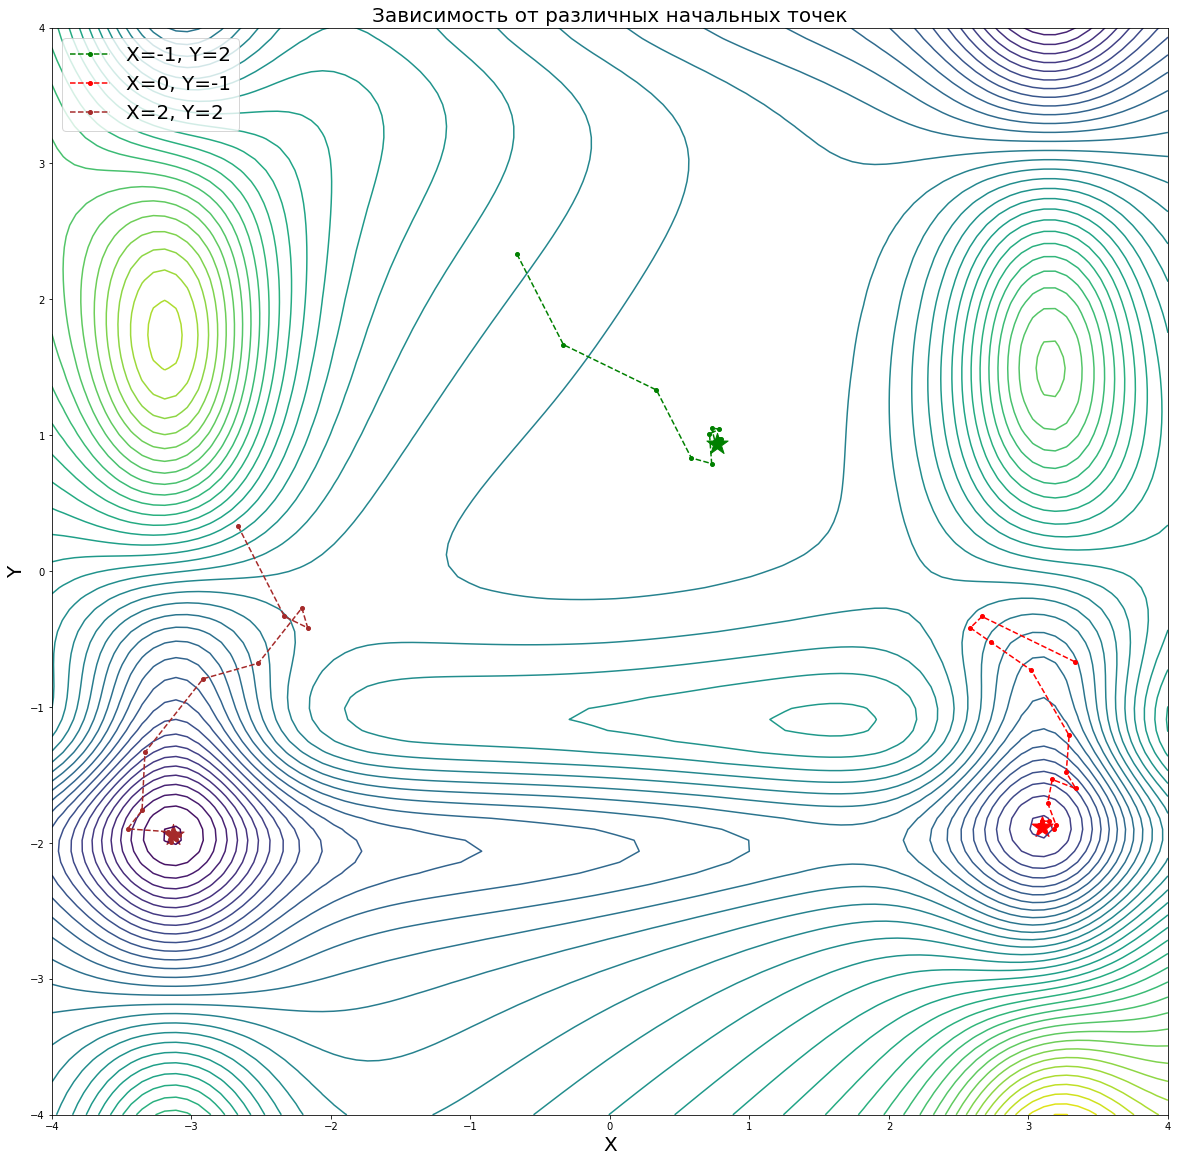

In [342]:
plt.figure(figsize=(20,20))
plt.contour(x, y, res, 40)
plt.plot(path1[0], path1[1], label = f"X=-1, Y=2", c = "green", ls = "--", marker = '.', markersize=8)
plt.plot(path2[0], path2[1], label = f"X=0, Y=-1", c = 'red', ls = "--", marker = '.', markersize=8)
plt.plot(path3[0], path3[1], label = f"X=2, Y=2", c = 'brown', ls = "--", marker = '.', markersize=8)
plt.scatter(final1[0], final1[1], c='green', s = 500, marker = '*')
plt.scatter(final2[0], final2[1], c='red', s = 500, marker = '*')
plt.scatter(final3[0], final3[1], c='brown', s = 500, marker = '*')
plt.legend(loc=2, prop={'size': 20})
plt.title("Зависимость от различных начальных точек", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.xlabel("X", fontsize=20)
plt.show()

***Вывод:***

Как мы можем заметить при разных значениях начальной точки алгоритм сходится к разным точкам.
Но их не так много(при близких начальных точках алгоритм все же сойдется к одной и той же точке).
На самом деле это довольно логично, ведь метод ищет локальный экстремум, и сходится к ближайшему. По этому если ставить начальную точку рядом с разными локальными экстремумами, то он и будет сходится к разным.